In [436]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import io
import seaborn as sns

# File Upload

Test env: Google Colab

metadata: https://data.cityofnewyork.us/api/views/jr24-e7cr

Source: https://catalog.data.gov/dataset/electric-consumption-and-cost-2010-april-2020

!! 파일을 TDS # 118번만 남겨서 'cut.csv'로 전처리 해줍니다 !!

그 다음 아래에 파일 선택

In [437]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!ls
!pwd
os.listdir()

Saving cut_consumption_NaN.csv to cut_consumption_NaN (9).csv
User uploaded file "cut_consumption_NaN.csv" with length 28588 bytes
'cut_consumption_NaN (1).csv'  'cut_consumption_NaN (6).csv'   cut.csv
'cut_consumption_NaN (2).csv'  'cut_consumption_NaN (7).csv'   cut_NaN.csv
'cut_consumption_NaN (3).csv'  'cut_consumption_NaN (8).csv'   sample_data
'cut_consumption_NaN (4).csv'  'cut_consumption_NaN (9).csv'
'cut_consumption_NaN (5).csv'   cut_consumption_NaN.csv
/content


['.config',
 'cut_consumption_NaN (7).csv',
 'cut.csv',
 'cut_consumption_NaN (3).csv',
 'cut_consumption_NaN (1).csv',
 'cut_consumption_NaN (5).csv',
 'cut_consumption_NaN (2).csv',
 'cut_consumption_NaN (9).csv',
 'cut_consumption_NaN (8).csv',
 'cut_consumption_NaN (6).csv',
 'cut_consumption_NaN.csv',
 'cut_consumption_NaN (4).csv',
 'cut_NaN.csv',
 'sample_data']

# 데이터세트

In [438]:
# csv_path = io.StringIO(uploaded['cut.csv'].decode('utf-8'))
filename = next(iter(uploaded))
# df = pd.read_csv(csv_path, index_col = 'Revenue Month', parse_dates = True, error_bad_lines=False, sep='\t')

# 날짜를 인덱스로
df = pd.read_csv(filename, index_col = 'Revenue Month', parse_dates = True, error_bad_lines=False, sep='\t')
df

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
Revenue Month,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1842038,12/24/2009,01/26/2010,33,7518362,N,11414.03,GOV/NYC/068,Yes,92800.0,5323.01,164,2132.00,3959.02
2010-02-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1844206,01/26/2010,02/25/2010,30,7518362,N,10948.54,GOV/NYC/068,Yes,84400.0,4841.18,172,2236.00,3871.36
2010-03-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1841379,02/25/2010,03/26/2010,29,7518362,N,10457.15,GOV/NYC/068,Yes,74400.0,4267.58,168,2184.00,4005.57
2010-04-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1847150,03/26/2010,04/26/2010,31,7518362,N,10277.70,GOV/NYC/068,Yes,74000.0,4244.64,144,1872.00,4161.06
2010-05-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1848673,04/26/2010,05/24/2010,28,7518362,N,10481.32,GOV/NYC/068,Yes,70000.0,4015.20,172,2236.00,4230.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,9488630,09/22/2020,10/22/2020,30,9985100,N,9942.85,GOV/NYC/068,Yes,75200.0,2532.74,156,1558.44,5851.67
2020-11-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,9576724,10/22/2020,11/20/2020,29,9985100,N,9395.38,GOV/NYC/068,Yes,74400.0,2505.79,160,1598.40,5291.19
2020-12-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,9659559,11/20/2020,12/23/2020,33,9985100,N,11473.03,GOV/NYC/068,Yes,87600.0,2950.37,156,1558.44,6964.22


In [439]:
# df['Revenue Month']

# 특성 파악

In [440]:
most_TDS_df = df.loc[df['TDS #'] == 118]

tmp_df = most_TDS_df

# date_time = pd.to_datetime(tmp_df.pop('Revenue Month'), format='%Y-%m-%d')

# plot_cols = ['Consumption (KWH)']
# plot_features = most_TDS_df[plot_cols]
# plot_features.index = date_time
# _ = plot_features.plot(subplots=True)

# date_time = pd.to_datetime(df.pop('Revenue Month'), format='%Y-%m')
# plot_features = df[plot_cols]
# plot_features.index = date_time
# _ = plot_features.plot(subplots=True)

# 결측치 처리

In [441]:
# 월별 데이터 인덱스
date_idx = pd.date_range('2010-01-01', periods=132, freq='MS')
date_idx

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=132, freq='MS')

In [442]:
df_ts_missing = pd.DataFrame(range(len(date_idx))
                          , columns=['Consumption (KWH)']
                          , index=date_idx)
df_ts_missing

,Consumption (KWH)
2010-01-01,0
2010-02-01,1
2010-03-01,2
2010-04-01,3
2010-05-01,4
...,...
2020-08-01,127
2020-09-01,128
2020-10-01,129
2020-11-01,130


In [443]:
df_ms = df['Consumption (KWH)'].resample('MS').sum()
for i in range(12):
  mean = 0
  for k in range(0, 131, 12):
    # 전체 월평균 계산
    mean += df_ms[k+i] / 12
  # 결측치에 대입
  df.loc['2011-'+str(i+1)+'-01', 'Consumption (KWH)'] = mean
  df.loc['2018-'+str(i+1)+'-01', 'Consumption (KWH)'] = mean

# 전체 행 확인
pd.set_option('display.max_rows', None)
df

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
Revenue Month,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1842038,12/24/2009,01/26/2010,33,7518362,N,11414.03,GOV/NYC/068,Yes,92800.000000,5323.01,164,2132.00,3959.02
2010-02-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1844206,01/26/2010,02/25/2010,30,7518362,N,10948.54,GOV/NYC/068,Yes,84400.000000,4841.18,172,2236.00,3871.36
2010-03-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1841379,02/25/2010,03/26/2010,29,7518362,N,10457.15,GOV/NYC/068,Yes,74400.000000,4267.58,168,2184.00,4005.57
2010-04-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1847150,03/26/2010,04/26/2010,31,7518362,N,10277.70,GOV/NYC/068,Yes,74000.000000,4244.64,144,1872.00,4161.06
2010-05-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1848673,04/26/2010,05/24/2010,28,7518362,N,10481.32,GOV/NYC/068,Yes,70000.000000,4015.20,172,2236.00,4230.12
2010-06-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1850072,05/24/2010,06/23/2010,30,7518362,N,13485.11,GOV/NYC/068,Yes,93600.000000,5368.90,204,2652.00,5464.21
2010-07-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1853251,06/23/2010,07/23/2010,30,7518362,N,16761.04,GOV/NYC/068,Yes,128000.000000,7342.08,240,3120.00,6298.96
2010-08-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1868916,07/23/2010,08/23/2010,31,7518362,Y,16181.77,GOV/NYC/068,Yes,112800.000000,6470.21,240,3120.00,6591.56
2010-09-01,ADAMS,BRONX,ADAMS,BLD 06,NONE,BLD 06,118,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1868917,08/23/2010,09/22/2010,30,7518362,N,15589.08,GOV/NYC/068,Yes,109200.000000,6263.71,240,3120.00,6205.37


In [444]:
pd.options.display.max_rows = 10
# df

# 훈련, 테스트 데이터 생성

In [445]:
charges = df[['Consumption (KWH)']]
# pd.DatetimeIndex()

In [446]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(charges)

In [447]:
# for debug
charges

,Consumption (KWH)
Revenue Month,
2010-01-01,92800.0
2010-02-01,84400.0
2010-03-01,74400.0
2010-04-01,74000.0
2010-05-01,70000.0
...,...
2020-10-01,75200.0
2020-11-01,74400.0
2020-12-01,87600.0


In [448]:
TEST_SIZE = 50
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [449]:
# train_data

In [450]:
# test_data

In [451]:
# X_train.shape

In [452]:
# y_train

In [453]:
def make_sample(data, window):
  train = []
  target = []
  for i in range(len(data)-window):
    train.append(data[i:i+window])
    target.append(data[i+window])
  return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 10)

# LSTM

In [454]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
        )
model.add(Dense(1))

In [455]:
# tf.data.experimental.enable_debug_mode()
# tf.config.run_functions_eagerly(True)
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 500, batch_size = 16)

Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 0.1602
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1265
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1012
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0833
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0690
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0596
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0559
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0541
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0547
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0544
Epoch 11/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0537
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0529
Epoch 13/100
5/5 [==============================] - 0s 8ms/st

In [456]:
# test_data

In [457]:
X_test, y_test = make_sample(test_data, 10)
print(X_test)
print(y_test)
pred = model.predict(X_test)

[[[0.33970195]
  [0.25716469]
  [0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]]

 [[0.25716469]
  [0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]]

 [[0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]]

 [[0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]]

 [[0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]
  [0.06495988]]

 [[0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]
  [0.06495988]
  [0.01184562]]

 [[0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 

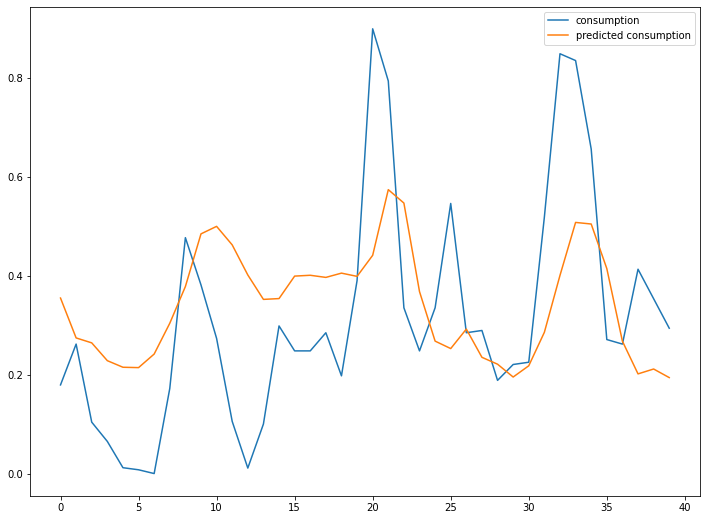

In [458]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='consumption')
plt.plot(pred, label='predicted consumption')
plt.legend()
plt.show()

# 모델 평가

In [459]:
results = model.evaluate(X_test, y_test, verbose=2)
print(results)

2/2 - 0s - loss: 0.0414 - 447ms/epoch - 223ms/step
0.04140067100524902


# SimpleRNN

In [460]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN

model2 = Sequential()
model2.add(SimpleRNN(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
        )
model2.add(Dense(1))

In [461]:
# tf.data.experimental.enable_debug_mode()
# tf.config.run_functions_eagerly(True)
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.fit(X_train, y_train, epochs = 500, batch_size = 16, validation_data=(X_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 61ms/step - loss: 0.0789 - val_loss: 0.0637
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0537 - val_loss: 0.0504
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0427 - val_loss: 0.0445
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0374 - val_loss: 0.0405
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0331 - val_loss: 0.0374
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0299 - val_loss: 0.0352
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0270 - val_loss: 0.0340
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0252 - val_loss: 0.0335
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0237 - val_loss: 0.0331
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0222 - val_loss: 0.0333
Epoch 11/100
5/5 [=

In [462]:
# test_data

In [463]:
X_test, y_test = make_sample(test_data, 10)
print(X_test)
print(y_test)
pred = model2.predict(X_test)

[[[0.33970195]
  [0.25716469]
  [0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]]

 [[0.25716469]
  [0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]]

 [[0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]]

 [[0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]]

 [[0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]
  [0.06495988]]

 [[0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]
  [0.06495988]
  [0.01184562]]

 [[0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 

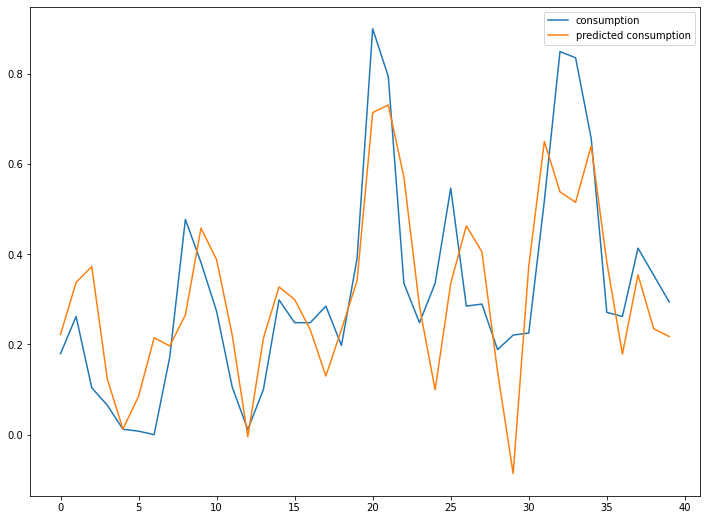

In [464]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='consumption')
plt.plot(pred, label='predicted consumption')
plt.legend()
plt.show()

# 모델 평가

In [465]:
results = model2.evaluate(X_test, y_test, verbose=2)
print(results)

2/2 - 0s - loss: 0.0219 - 22ms/epoch - 11ms/step
0.0218823105096817


# SimpleRNN - 2

In [466]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN

model3 = Sequential()
model3.add(SimpleRNN(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
        )
model3.add(Dense(1))

In [467]:
# tf.data.experimental.enable_debug_mode()
# tf.config.run_functions_eagerly(True)
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy')
model3.fit(X_train, y_train, epochs = 500, batch_size = 16)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 2.5298
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 1.8486
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 1.2072
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.8691
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.8584
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.8121
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7649
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7558
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7329
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 0.7175
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7073
Epoch 12/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6977
Epoch 13/100
5/5 [==============================] - 0s 5ms/st

In [468]:
# test_data

In [469]:
X_test, y_test = make_sample(test_data, 10)
print(X_test)
print(y_test)
pred = model3.predict(X_test)

[[[0.33970195]
  [0.25716469]
  [0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]]

 [[0.25716469]
  [0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]]

 [[0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]]

 [[0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]]

 [[0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]
  [0.06495988]]

 [[0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]
  [0.06495988]
  [0.01184562]]

 [[0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 

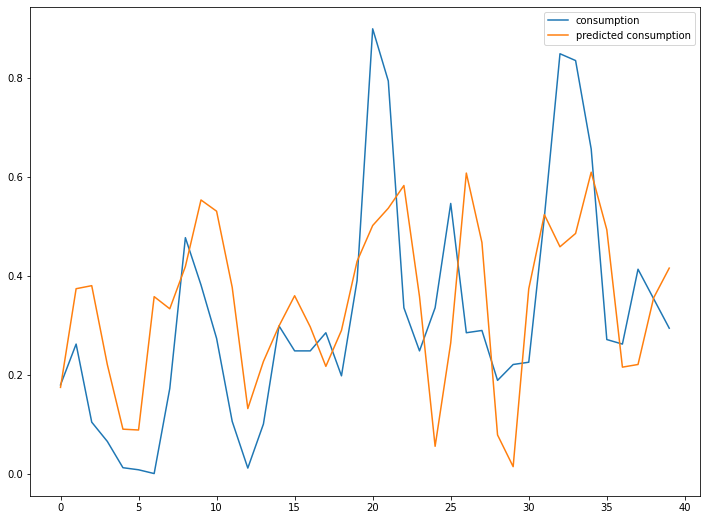

In [470]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='consumption')
plt.plot(pred, label='predicted consumption')
plt.legend()
plt.show()

# 모델 평가

In [471]:
results = model3.evaluate(X_test, y_test, verbose=2)
print(results)

2/2 - 0s - loss: 0.6043 - 199ms/epoch - 100ms/step
0.6043473482131958


# LSTM - 2

In [472]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model4 = Sequential()
model4.add(LSTM(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
        )
model4.add(Dense(units=512, activation='relu'))
model4.add(Dense(1))

In [487]:
# tf.data.experimental.enable_debug_mode()
# tf.config.run_functions_eagerly(True)
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')
history1 = model4.fit(X_train, y_train, epochs = 500, batch_size = 16)

Epoch 1/500
5/5 [==============================] - 2s 7ms/step - loss: 0.0267
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 0.0267
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0269
Epoch 4/500
5/5 [==============================] - 0s 7ms/step - loss: 0.0250
Epoch 5/500
5/5 [==============================] - 0s 7ms/step - loss: 0.0250
Epoch 6/500
5/5 [==============================] - 0s 7ms/step - loss: 0.0235
Epoch 7/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0242
Epoch 8/500
5/5 [==============================] - 0s 7ms/step - loss: 0.0235
Epoch 9/500
5/5 [==============================] - 0s 7ms/step - loss: 0.0240
Epoch 10/500
5/5 [==============================] - 0s 8ms/step - loss: 0.0232
Epoch 11/500
5/5 [==============================] - 0s 7ms/step - loss: 0.0244
Epoch 12/500
5/5 [==============================] - 0s 7ms/step - loss: 0.0253
Epoch 13/500
5/5 [==============================] - 0s 7ms/s

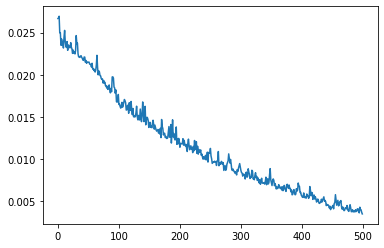

In [488]:
plt.plot(history1.history['loss'], label="loss")
plt.show()

In [475]:
# test_data

In [489]:
X_test, y_test = make_sample(test_data, 10)
print(X_test)
print(y_test)
pred = model4.predict(X_test)

[[[0.33970195]
  [0.25716469]
  [0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]]

 [[0.25716469]
  [0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]]

 [[0.23423768]
  [0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]]

 [[0.15628582]
  [0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]]

 [[0.17921284]
  [0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]
  [0.06495988]]

 [[0.34428735]
  [0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 ]
  [0.1039358 ]
  [0.06495988]
  [0.01184562]]

 [[0.82116928]
  [0.5643867 ]
  [0.39472679]
  [0.42223921]
  [0.17921284]
  [0.2617501 

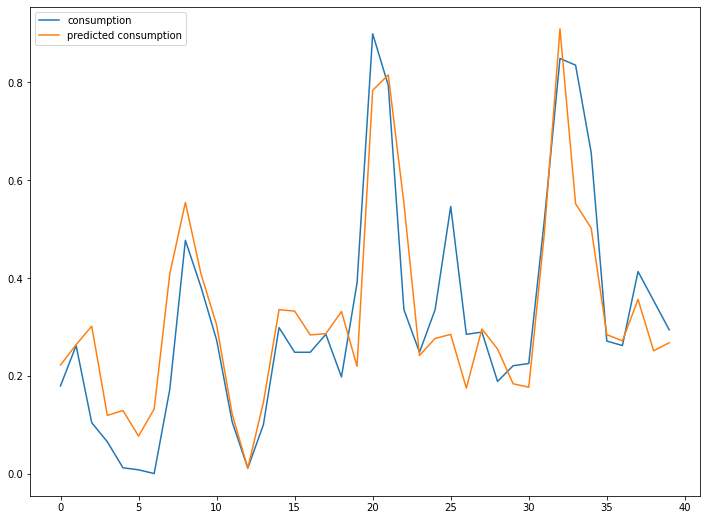

In [490]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='consumption')
plt.plot(pred, label='predicted consumption')
plt.legend()
plt.show()

# 모델 평가

In [478]:
results = model4.evaluate(X_test, y_test, verbose=2)
print(results)

2/2 - 0s - loss: 0.0284 - 492ms/epoch - 246ms/step
0.028365839272737503


# TEST

In [479]:
# MAX_EPOCHS = 100

# def compile_and_fit(model, window, patience=2):
#   early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                     patience=patience,
#                                                     mode='min')

#   model.compile(loss=tf.losses.MeanSquaredError(),
#                 optimizer=tf.optimizers.Adam(),
#                 metrics=[tf.metrics.MeanAbsoluteError()])

#   history = model.fit(window.train, epochs=MAX_EPOCHS,
#                       validation_data=window.val,
#                       callbacks=[early_stopping])
#   return history

In [480]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [481]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [482]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [483]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [484]:
wide_window = WindowGenerator(
    input_width=12, label_width=12, shift=1,
    label_columns=['Consumption (KWH)'])

In [485]:
# history = compile_and_fit(model2, wide_window)

# Ipython.display.clear_output()
# val_performance['SimpleRNN'] = model2.evaluate(wide_window.val)
# performance['SimpleRNN'] = model2.evaluate(widw_window.test, verbose=0)

In [486]:
# wide_window.plot(model2)